# Мелешкин Кирилл

In [ ]:
# https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv

In [3]:
# Очень большое кол-во библиотек
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Исходная таблица
seg = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv')
seg

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


Задание 1

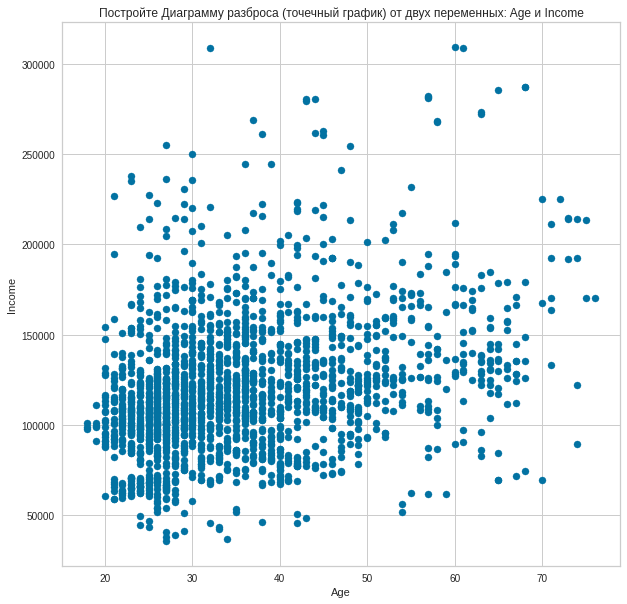

In [4]:
# Number 1
plt.figure(figsize=(10, 10))
plt.title("Постройте Диаграмму разброса (точечный график) от двух переменных: Age и Income")
plt.scatter(seg['Age'], seg['Income'], s = 50)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

# Выводы:
# Основные покупатели - люди от 20 до 50 лет (значит в приоритете товары для 20-50 лет)
# Большинство покупателей зарабатывают где-то от 9000 до 16000 (значит дорогие товары не в приоритете)
# Доход не зависит от возраста (бизнесменом можно стать и в 32 года, как видно на графике)

<Figure size 720x720 with 0 Axes>

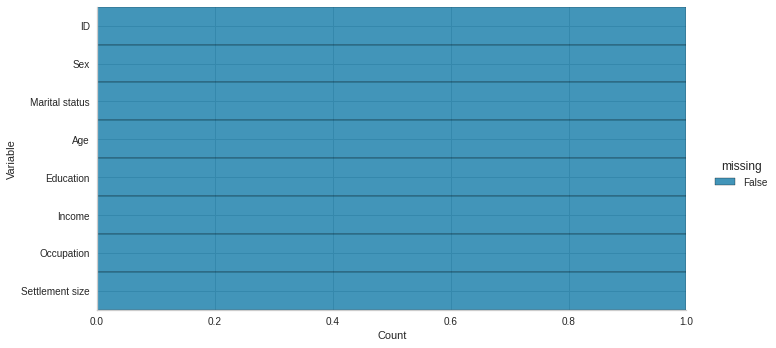

In [5]:
# Number 2
plt.figure(figsize=(10, 10))
sns.displot(data = seg.isna().melt(value_name = "missing"), y = "variable", hue = "missing", multiple = "fill", aspect = 2)
plt.xlabel("Count")
plt.ylabel("Variable")
plt.show()

# Вывод
# У нас есть полная информация о покупателях (замечательная агентная служба)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


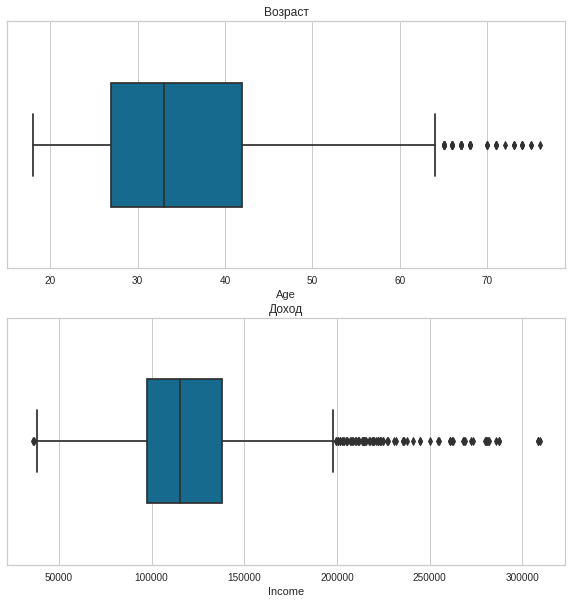

In [6]:
# Number 3

fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.boxplot(seg['Age'], ax = ax[0], width = 0.5)
sns.boxplot(seg['Income'], ax = ax[1], width = 0.5)
ax[0].set_title("Возраст")
ax[1].set_title("Доход")
plt.show()

# Вывод
# Очень странная диаграмма
# Есть покупатели старше 70-ти лет, покупатели с доходом ниже 40000 и выше 200000

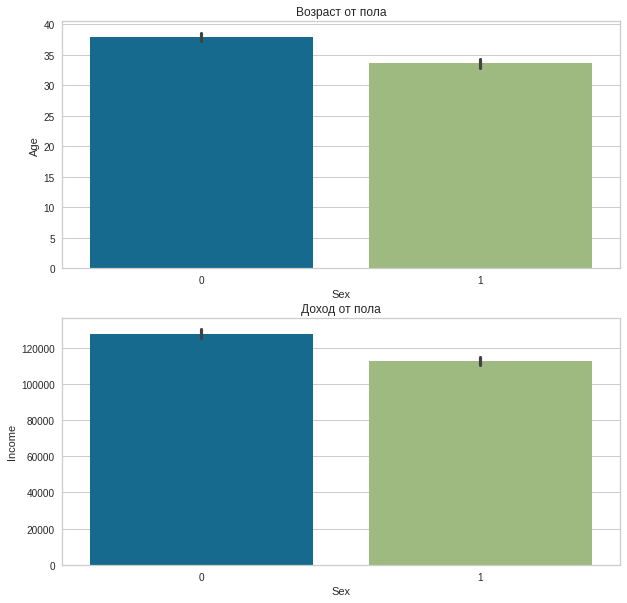

In [7]:
# Number 4

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(data = seg, ax = ax[0], x = "Sex", y = "Age")
sns.barplot(data = seg, ax = ax[1], x = "Sex", y = "Income")

ax[0].set_title("Возраст от пола")
ax[1].set_title("Доход от пола")
plt.show()

# Выводы
# Первый пол (0) тратит больше, т.к. доход больше

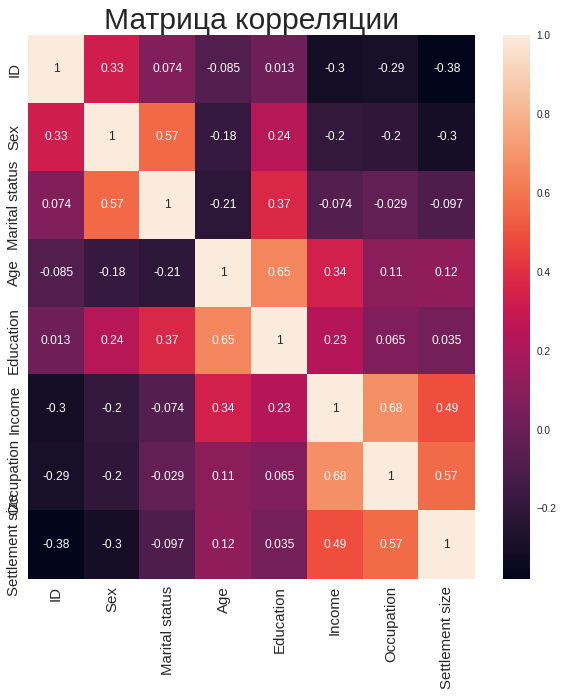

In [8]:
# Number 5

plt.figure(figsize=(10, 10))
sns.heatmap(seg.corr(), xticklabels = seg.corr().columns, yticklabels = seg.corr().columns, annot=True)

plt.title('Матрица корреляции', fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# Вывод
# Красивый график)

Задание 2

In [9]:
# Number 1

# Таблица для определения числа кластеров
ss = seg.loc[:, ["Sex",	"Marital status",	"Age",	"Education",	"Income",	"Occupation",	"Settlement size"]]

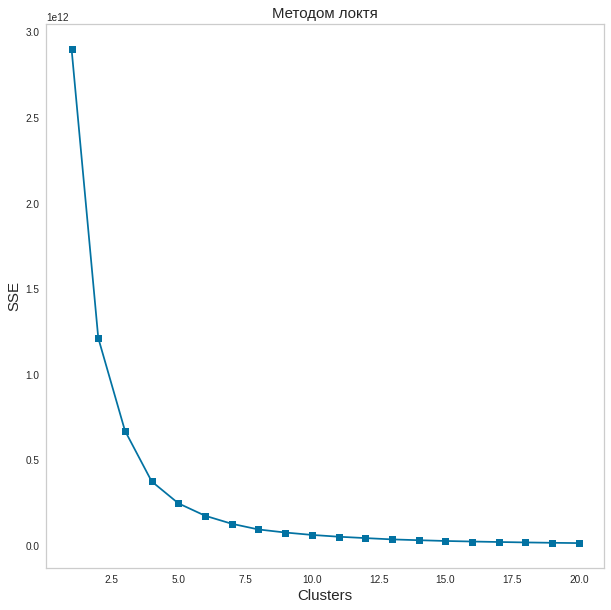

In [10]:
# Метод локтя
S = []
plt.figure(figsize=(10, 10))
plt.grid()
plt.title("Методом локтя", fontsize = 15)
for i in range(1, 21):
  km = KMeans(i)
  km.fit(ss)
  S.append(km.inertia_)
plt.plot(range(1, 21), S, marker = "s")
plt.xlabel("Clusters", fontsize = 15)
plt.ylabel("SSE", fontsize = 15)
plt.show()

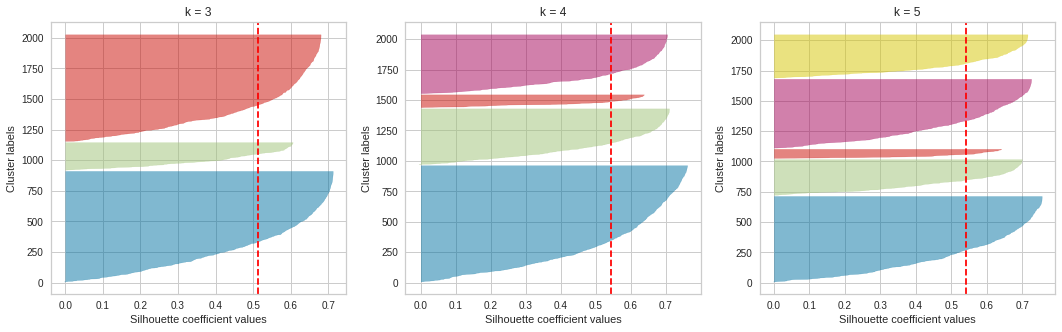

In [11]:
# Метод силуэта

fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in [3, 4, 5]:
    km = KMeans(i)
    km.fit(ss.values)
    ax[i - 3].set_title("k = " + str(i))
    ax[i - 3].set_xlabel("Silhouette coefficient values")
    ax[i - 3].set_ylabel("Cluster labels")
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[i - 3])
    visualizer.fit(ss.values)

In [12]:
# Из двух графиков можно сделать вывод, что наиболее оптимальное число кластеров - 3

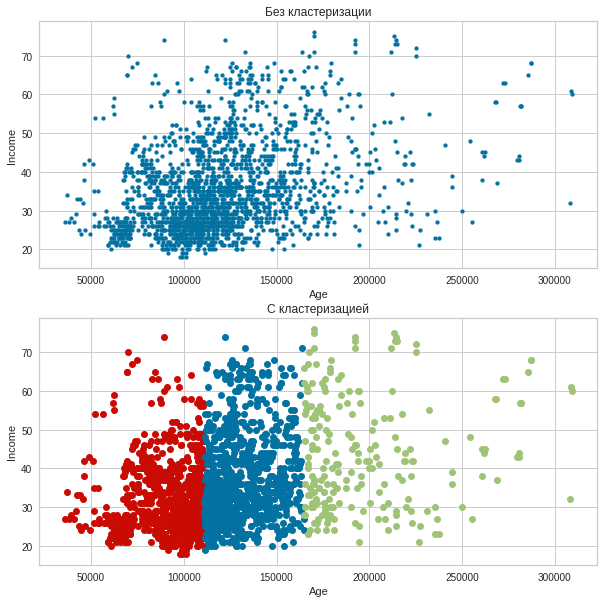

In [13]:
# Number 2

km = KMeans(3)
km.fit(seg)
cl = pd.concat([seg, pd.DataFrame(km.predict(seg), columns = ["sig"])], axis = 1)
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].scatter(seg['Income'], seg['Age'], s = 15)
ax[0].set_title("Без кластеризации")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Income")

ax[1].plot(cl[cl["sig"] == 0]['Income'], cl[cl["sig"] == 0]['Age'], 'ro')
ax[1].plot(cl[cl["sig"] == 1]['Income'], cl[cl["sig"] == 1]['Age'], 'bo')
ax[1].plot(cl[cl["sig"] == 2]['Income'], cl[cl["sig"] == 2]['Age'], 'go')
ax[1].set_title("С кластеризацией")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Income")
plt.show()

Задание 3

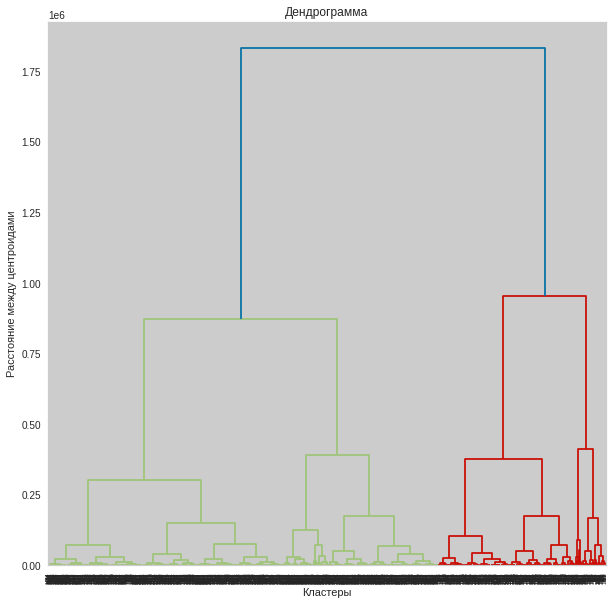

In [19]:
# Number 1

DG = linkage(ss, 'ward')

plt.figure(figsize=(10, 10))
dendrogram(DG)
plt.title("Дендрограмма")
plt.ylabel("Расстояние между центроидами")
plt.xlabel("Кластеры")

plt.show()

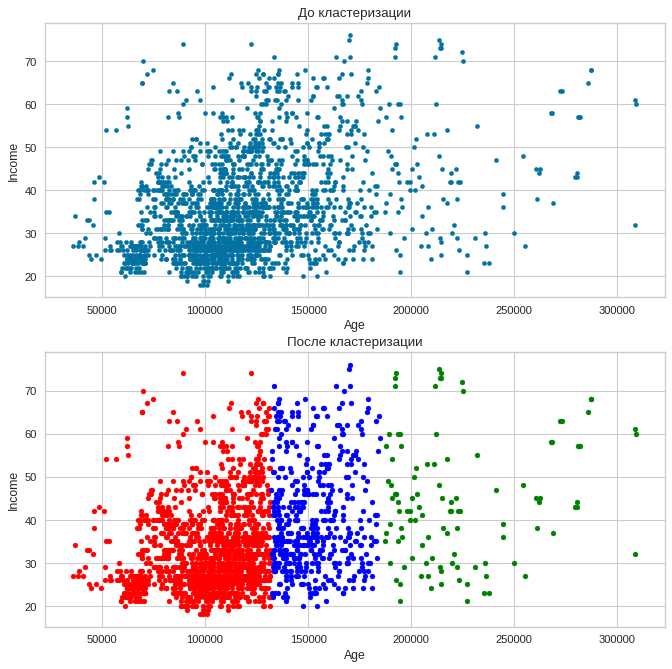

In [22]:
# Number 2

l = fcluster(DG, 3, criterion='maxclust')
ss['sig'] = locals

fig, ax = plt.subplots(2, 1, figsize=(10, 10), dpi=80)
ax[0].scatter(ss['Income'], ss['Age'], s=15)
ax[0].set_title("До кластеризации")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Income")

ax[1].scatter(ss.loc[l==3, 'Income'], ss.loc[l==3, 'Age'], s=20, marker='o', color='green')
ax[1].scatter(ss.loc[l==1, 'Income'], ss.loc[l==1, 'Age'], s=20, marker='o', color='red')
ax[1].scatter(ss.loc[l==2, 'Income'], ss.loc[l==2, 'Age'], s=20, marker='o', color='blue')
ax[1].set_title("После кластеризации")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Income")

plt.show()